# **생능 출판사 "으뜸 데이터 분석과 머신러닝"(1판) 교재의 소스 코드**
## *7장 머신러닝 기초 : 사이킷런과 선형회귀*
---
* 출판사 : 생능 출판사( http://www.booksr.co.kr/ )
* 저자 : 박동규, 강영민
* 책의 소스코드 저장소 : https://github.com/dongupak/DataML
* 안내 : 이 노트북은 책의 코드를 담고 있습니다.
* 저작권 : 본 주피터 노트북 코드는 자유롭게 배포가능하지만 위의 출판사, 저서, 저자표기와 함께 배포해 주십시오.
---

### 7.1 경험을 통해서 학습하는 인간을 통해 지능을 정의해 보자

### 7.2 머신러닝의 정의와 종류를 알아보자



### 7.6 간단한 선형 회귀를 수행해 보자

In [ ]:
import numpy as np 
from sklearn import linear_model  # scikit-learn 모듈을 가져온다

regr = linear_model.LinearRegression() 

In [ ]:
X = [[163], [179], [166], [169], [171]]
y = [54, 63, 57, 56, 58]
regr.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
coef = regr.coef_            # 직선의 기울기
intercept = regr.intercept_  # 직선의 절편
score = regr.score(X, y)     # 학습된 직선이 데이터를 얼마나 잘 따르나

print("y = {}* X + {:.2f}".format(coef.round(2), intercept))
print("데이터와 선형회귀 직선의 관계점수: {:.1%}".format(score))

y = [0.53]* X + -32.50
데이터와 선형회귀 직선의 관계점수: 91.9%


### 7.7 데이터를 시각화하고 차원을 증가시키자

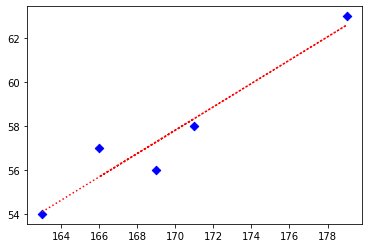

In [ ]:
import matplotlib.pyplot as plt

# 학습 데이터와 y 값을 산포도로 그린다. 
plt.scatter(X, y, color='blue', marker='D')
# 학습 데이터를 입력으로 하여 예측값을 계산한다.
y_pred = regr.predict(X)
# 계산된 기울기와 y 절편을 가지는 점선을 그려보자
plt.plot(X, y_pred, 'r:')

In [ ]:
unseen = [[167]]
result = regr.predict(unseen)
print('동윤이의 키가 {}cm 이므로 몸무게는 {}kg으로 추정됨'.format(\
                      unseen, result.round(1)))

동윤이의 키가 [[167]]cm 이므로 몸무게는 [56.2]kg으로 추정됨


In [ ]:
coef = regr.coef_            # 직선의 기울기
intercept = regr.intercept_  # 직선의 절편
score = regr.score(X, y)     # 학습된 직선이 데이터를 얼마나 잘 따르나

print("y = {}* X + {:.2f}".format(coef.round(2), intercept))
print("데이터와 선형회귀 직선의 관계점수: {:.1%}".format(score))

y = [0.53]* X + -32.50
데이터와 선형회귀 직선의 관계점수: 91.9%


In [ ]:
from sklearn import linear_model 
 
regr = linear_model.LinearRegression() 
# 남자는 0, 여자는 1
X = [[168, 0], [166, 0], [173, 0], [165, 0], [177, 0], [163, 0], \
     [178, 0], [172, 0], [163, 1], [162, 1], [171, 1], [162, 1], \
     [164, 1], [162, 1], [158, 1], [173, 1], ]    # 입력데이터를 2차원으로 만들어야 함 
y = [65, 61, 68, 63, 68, 61, 76, 67, 55, 51, 59, 53, 61, 56, 44, 57]     # y 값은 1차원 데이터
regr.fit(X, y)         # 학습 
print('계수 :', regr.coef_ )
print('절편 :', regr.intercept_)
print('점수 :', regr.score(X, y))
print('동윤이와 은지의 추정 몸무게 :', regr.predict([[167, 0], [167, 1]]))

계수 : [ 0.74803397 -7.23030041]
절편 : -61.227783894306384
점수 : 0.8425933302504423
동윤이와 은지의 추정 몸무게 : [63.69388959 56.46358918]


### 7.9 오차 함수의 구현과 파라미터 공간의 최적값

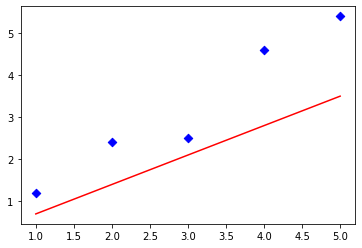

In [ ]:
import matplotlib.pyplot as plt

x = np.array([1, 2, 3, 4, 5]) # 
y = np.array([1.2, 2.4, 2.5, 4.6, 5.4]) # y 데이터

plt.scatter(x, y, color='blue', marker='D')
# 추정 그래프를 빨간색 실선으로 그림
plt.plot(x, 0.7 * x, 'r-')

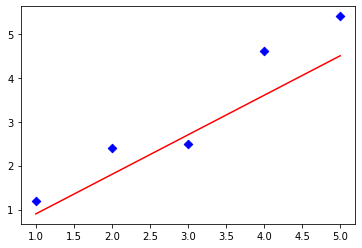

In [ ]:
plt.scatter(x, y, color='blue', marker='D')
# 추정 그래프를 빨간색 실선으로 그림
plt.plot(x, 0.9 * x, 'r-')

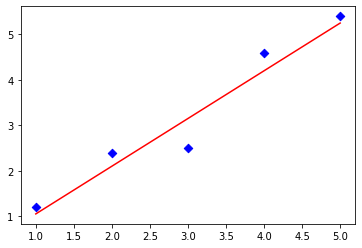

In [ ]:
plt.scatter(x, y, color='blue', marker='D')
# 추정 그래프를 빨간색 실선으로 그림
plt.plot(x, 1.05 * x, 'r-')

In [ ]:
import numpy as np

y = np.array([1.2, 2.4, 2.5, 4.6, 5.4])
y_hat = np.array([1, 2, 3, 4, 5])
diff = (y_hat - y) ** 2     # y_hat과 y의 차이값의 제곱
e_mse = diff.sum() / len(y)
print('평균 제곱 오차 = ', e_mse)

평균 제곱 오차 =  0.19399999999999995


In [ ]:
from sklearn.metrics import mean_squared_error

print('평균 제곱 오차 = ', mean_squared_error(y_hat, y))

평균 제곱 오차 =  0.19399999999999995


### 미분과 경사 하강법

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

X = np.array([1, 4.5, 9, 10, 13])
y = np.array([0, 0.2, 2.5, 5.4, 7.3])

w, b = 0, 0    # w, b 초기값을 0으로 두자
learning_rate, epoch = 0.005, 1000 # 학습률과 학습횟수(에폭)
n = len(X)  # 입력데이터 개수

for i in range(epoch):   # 학습 루프
    y_pred = w*X + b     # 현재 w, b를 이용한 작업 T
    error = y_pred - y   # 성능척도 P
    w = w - learning_rate * (error * X).sum() # 경험 E로 개선
    b = b - learning_rate * error.sum()

print('w = ', w.round(2), 'b =', b.round(2))

w =  0.63 b = -1.65


### 7.12 미분과 경사 하강법

In [ ]:
from sklearn import linear_model
import numpy as np
X = np.array([1, 4.5, 9, 10, 13])
y = np.array([0, 0.2, 2.5, 5.4, 7.3])
regr = linear_model.LinearRegression() # 절편값 b는 0으로 둔다
X = X[:, np.newaxis]
regr.fit(X, y) # 학습
print('w =', regr.coef_.round(2),\
      ', b =', regr.intercept_.round(2))

w = [0.63] , b = -1.65


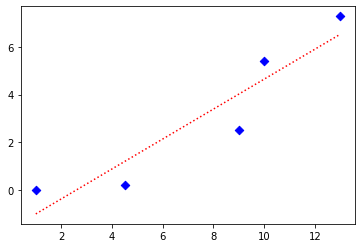

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

X = np.array([1, 4.5, 9, 10, 13])
y = np.array([0, 0.2, 2.5, 5.4, 7.3])
plt.scatter(X, y, color='blue', marker='D')
# 계산으로 구한 w, b를 이용하여 선형 회귀 직선을 그리자
y_pred = 0.63 * X - 1.65  
plt.plot(X, y_pred, 'r:')

In [ ]:
# 학습률이 너무 작은 경우
import numpy as np
import matplotlib.pyplot as plt

X = np.array([1, 4.5, 9, 10, 13])
y = np.array([0, 0.2, 2.5, 5.4, 7.3])

w, b = 0, 0    # w, b 초기값을 0으로 두자
learning_rate, epoch = 0.00001, 1000 # 학습률과 학습횟수(에폭)
n = len(X)  # 입력데이터 개수

for i in range(epoch):   # 학습 루프
    y_pred = w*X + b     # 현재 w, b를 이용한 작업 T
    error = y_pred - y   # 성능척도 P
    w = w - learning_rate * (error * X).sum() # 경험 E로 개선
    b = b - learning_rate * error.sum()

print('w = ', w.round(2), 'b =', b.round(2))

w =  0.45 b = 0.03


In [ ]:
# 학습률이 너무 큰 경우
import numpy as np
import matplotlib.pyplot as plt

X = np.array([1, 4.5, 9, 10, 13])
y = np.array([0, 0.2, 2.5, 5.4, 7.3])

w, b = 0, 0    # w, b 초기값을 0으로 두자
learning_rate, epoch = 1.0, 1000 # 학습률과 학습횟수(에폭)
n = len(X)  # 입력데이터 개수

for i in range(epoch):   # 학습 루프
    y_pred = w*X + b     # 현재 w, b를 이용한 작업 T
    error = y_pred - y   # 성능척도 P
    w = w - learning_rate * (error * X).sum() # 경험 E로 개선
    b = b - learning_rate * error.sum()

print('w = ', w.round(2), 'b =', b.round(2))

w =  nan b = nan


/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:47: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in double_scalars
  from ipykernel import kernelapp as app


In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error as mse

# 5개 점의 x, y 좌표값
x = np.array([1, 4.5, 9, 10, 13])
y = np.array([0, 0.2, 2.5, 5.4, 7.3])

w_list = np.arange(1.0, 0.2, -0.1)
for w in w_list:     # w를 바꾸어가며 예측치와 정답의 오차 비교
   y_hat = w * x
   print('w = {:.1f}, 평균제곱 오차: {:.2f}'.format(w, mse(y_hat, y)))

w = 1.0, 평균제곱 오차: 23.08
w = 0.9, 평균제곱 오차: 15.86
w = 0.8, 평균제곱 오차: 10.13
w = 0.7, 평균제곱 오차: 5.89
w = 0.6, 평균제곱 오차: 3.13
w = 0.5, 평균제곱 오차: 1.85
w = 0.4, 평균제곱 오차: 2.06
w = 0.3, 평균제곱 오차: 3.75


In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error as mse 

# 5개 점의 x, y 좌표값
x = np.array([1, 4.5, 9, 10, 13])
y = np.array([0, 0.2, 2.5, 5.4, 7.3])
ws = np.arange(1.0, 0.0, -0.1)
ys = []
print('ws =', ws)
for i in list(ws):
    y_hat = i * x
    ys.append(mse(y_hat, y))

print('ys : ', ys, 'min', np.min(ws))

ws = [1.  0.9 0.8 0.7 0.6 0.5 0.4 0.3 0.2 0.1]
ys :  [23.077999999999996, 15.8625, 10.132000000000001, 5.886500000000003, 3.1260000000000012, 1.8505000000000003, 2.0599999999999987, 3.7544999999999957, 6.933999999999993, 11.59849999999999] min 0.1000000000000002


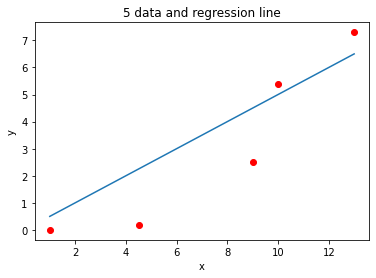

In [ ]:
import matplotlib.pyplot as plt

plt.title('5 data and regression line')

plt.scatter(x, y, c='red')
plt.plot(x, 0.5 * x)
plt.xlabel('x')              
plt.ylabel('y')    

plt.show()

In [ ]:
plt.title('MSE optimization graph')
plt.plot(ws, ys, c='blue')

plt.xlabel('w')              
plt.ylabel('mse') 

NameError: ignored

In [ ]:
import numpy as np

X = np.array([1, 4.5, 9, 10, 13])
y = np.array([0, 0.2, 2.5, 5.4, 7.3])

w, b = 0, 0   # w, b의 초기값을 0으로 두자
learning_rate, epoch = 0.005, 1000 # 학습률과 학습횟수
n = len(X)  # 입력데이터 개수

for i in range(epoch):  # 학습 루프
  y_pred = w*X + b      # 현재 w, b를 이용한 작업 T
  error = y_pred - y    # 성능척도 P
  w = w - learning_rate * (error * X).sum() # 경험 E로 개선
  b = b - learning_rate * error.sum()

print('w =', w.round(2), ', b =', b.round(2))

w = 0.63 , b = -1.65


In [ ]:
from sklearn import linear_model
import numpy as np

X = np.array([1, 4.5, 9, 10, 13])
y = np.array([0, 0.2, 2.5, 5.4, 7.3])
regr = linear_model.LinearRegression() # 절편값 b는 0으로 둔다
X = X[:, np.newaxis]
regr.fit(X, y)         # 학습 

print('w =', regr.coef_.round(2), \
      ', b =', regr.intercept_.round(2))

w = [0.63] , b = -1.65


In [ ]:
import numpy as np

X = np.array([1, 4.5, 9, 10, 13])
y = np.array([0, 0.2, 2.5, 5.4, 7.3])

w, b = 0, 0   # w, b의 초기값을 0으로 두자
learning_rate, epoch = 0.00001, 1000 # 학습률과 학습횟수
n = len(X)  # 입력데이터 개수

for i in range(epoch):  # 학습 루프
  y_pred = w*X + b      # 현재 w, b를 이용한 작업 T
  error = y_pred - y    # 성능척도 P
  w = w - learning_rate * (error * X).sum() # 경험 E로 개선
  b = b - learning_rate * error.sum()

print('w =', w.round(2), ', b =', b.round(2))

w = 0.45 , b = 0.03


In [ ]:
import numpy as np

X = np.array([1, 4.5, 9, 10, 13])
y = np.array([0, 0.2, 2.5, 5.4, 7.3])

w, b = 0, 0   # w, b의 초기값을 0으로 두자
learning_rate, epoch = 1.0, 1000 # 학습률과 학습횟수
n = len(X)  # 입력데이터 개수

for i in range(epoch):  # 학습 루프
  y_pred = w*X + b      # 현재 w, b를 이용한 작업 T
  error = y_pred - y    # 성능척도 P
  w = w - learning_rate * (error * X).sum() # 경험 E로 개선
  b = b - learning_rate * error.sum()

print('w =', w.round(2), ', b =', b.round(2))

w = nan , b = nan


/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:47: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in double_scalars
  del sys.path[0]


## 감사합니다